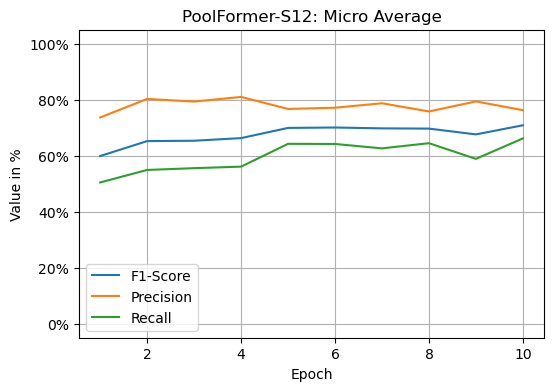

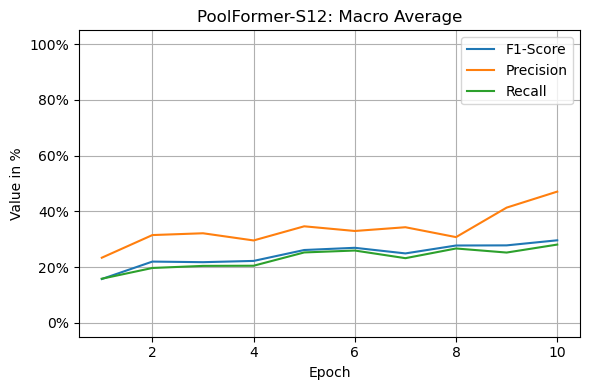

In [1]:
import pickle
from pathlib import Path

from utils.plotting import create_micro_macro_plot

model_name = "PoolFormer-S12"
img_dir = Path("img/")
results_dir = Path("checkpoints/")

with open(f"checkpoints/{model_name}_results.pkl", "rb") as f:
    results = pickle.load(f)

create_micro_macro_plot(
    results,
    show=True,
    save_micro=str(img_dir / f"{model_name}_micro.png"),
    save_macro=str(img_dir / f"{model_name}_macro.png"),
    model_type=model_name,
)

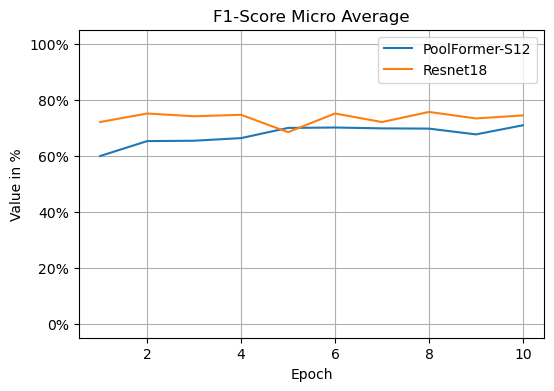

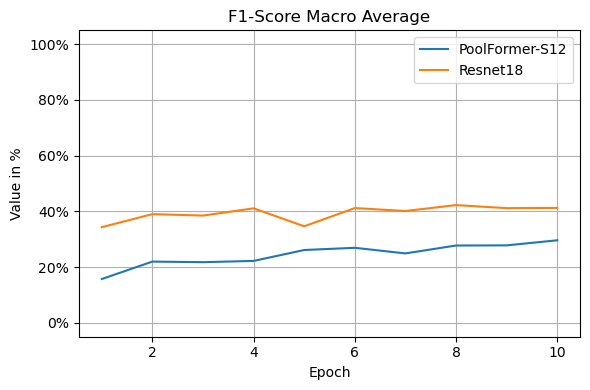

In [8]:
import pickle
from pathlib import Path

from utils.plotting import create_model_comparison_plot

model_names = ["PoolFormer-S12", "Resnet18"]
img_dir = Path("img/")
results_dir = Path("checkpoints/")

results = {
    "micro avg": {},
    "macro avg": {},
}
for model_name in model_names:
    with open(f"checkpoints/{model_name}_results.pkl", "rb") as f:
        curr_results = pickle.load(f)
        results["micro avg"][model_name.lower()] = curr_results["micro avg"]["f1-score"]
        results["macro avg"][model_name.lower()] = curr_results["macro avg"]["f1-score"]

create_model_comparison_plot(
    results,
    model_types=model_names,
    show=True,
    save_micro=str(img_dir / f"{'-'.join(model_names)}_micro.png"),
    save_macro=str(img_dir / f"{'-'.join(model_names)}_macro.png"),
)

In [ ]:
import torch
from utils.plotting import create_results_plot
from pathlib import Path

results_path = Path("results")
results_file = "poolformer_results_2024-01-01_22-04-47"


results = torch.load(str(results_path / results_file) + ".pkl")


# Nicely print precision recall f1 for defined avg type
def print_final_results(data: dict, avg_type: str, fields: list[str], idx: int = -1):
    print(f"Results for given data reporting scores for {avg_type}:")
    for field in fields:
        print(f"{field}: {data[avg_type][field][idx]:.2f}")


print_final_results(
    results["global"], "weighted avg", ["precision", "recall", "f1-score"]
)

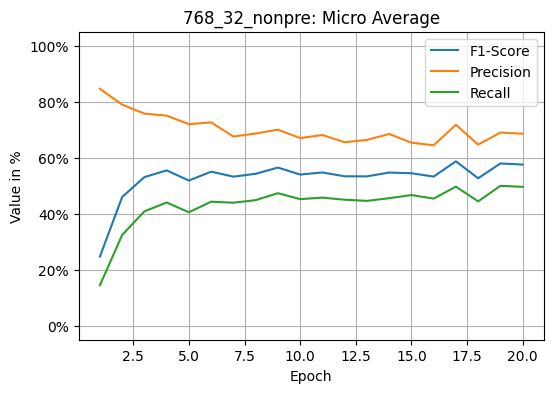

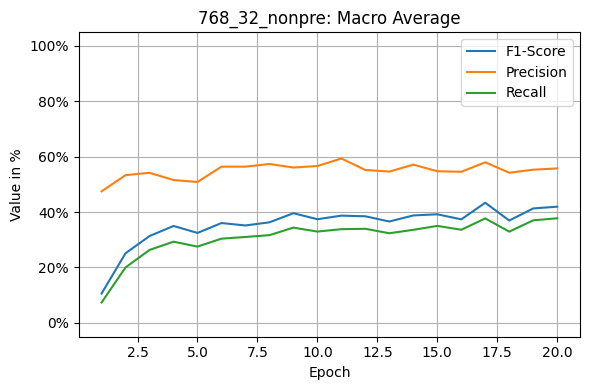

In [6]:
from pathlib import Path
import torch

from utils.plotting import create_micro_macro_plot

model_name = "768_32_nonpre"
img_dir = Path("img/")
results_dir = Path("checkpoints/")

# with open(f"epochs(3)_comrounds(20)_2024-02-03_19-29-12_768_32.pkl", "rb") as f:
results = torch.load("epochs(3)_comrounds(20)_2024-02-03_19-29-12_768_32.pkl")['global']

create_micro_macro_plot(
    results,
    show=True,
    save_micro=str(img_dir / f"{model_name}_micro.png"),
    save_macro=str(img_dir / f"{model_name}_macro.png"),
    model_type=model_name,
)

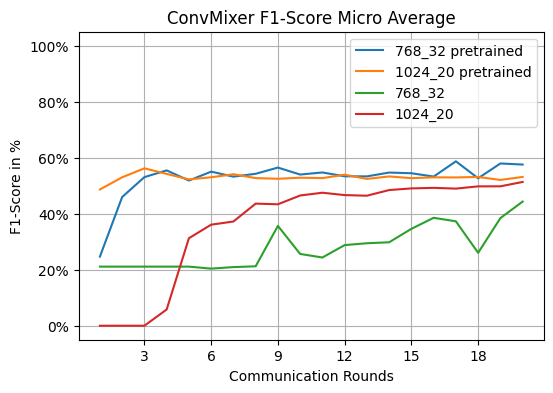

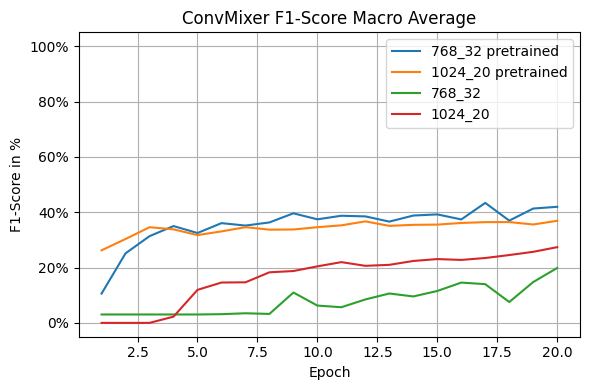

In [1]:
import torch
from pathlib import Path

from utils.plotting import create_model_comparison_plot

results_paths = [
    "epochs(3)_comrounds(20)_2024-02-03_19-29-12_768_32.pkl",
    "epochs(3)_comrounds(20)_2024-02-04_16-38-56_1024_20_ks9_p14.pkl",
    "epochs(3)_comrounds(20)_2024-02-06_13-43-05_768_32_nonpre.pkl",
    "epochs(3)_comrounds(20)_2024-02-07_10-27-46_1024_20_ks9_p14_nonpre.pkl"
]

model_names = ["768_32 pretrained", "1024_20 pretrained", "768_32", "1024_20"]

img_dir = Path("img/")
results_dir = Path("checkpoints/")

results = {
    "micro avg": {},
    "macro avg": {},
}
for res_path, model_name in zip(results_paths, model_names):
    curr_results = torch.load(str(res_path))['global']
    results["micro avg"][model_name.lower()] = curr_results["micro avg"]["f1-score"]
    results["macro avg"][model_name.lower()] = curr_results["macro avg"]["f1-score"]

create_model_comparison_plot(
    results,
    model_types=model_names,
    show=True,
    save_micro=str(img_dir / f"{'-'.join(model_names)}_micro.png"),
    save_macro=str(img_dir / f"{'-'.join(model_names)}_macro.png"),
    model_type='ConvMixer'
)